In [8]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
%matplotlib inline
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yingchenghan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('dataset.csv', index_col = 'Unnamed: 0')
print(dataset.shape)

(24783, 6)


In [3]:
dataset.index=[np.arange(24783)]

In [4]:
dataset.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
dataset.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [5]:
y=dataset['class'].values
y
## 0:hate speech; 1:offensive language; 2:neither

array([2, 1, 1, ..., 1, 1, 2])

In [6]:
dataset['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

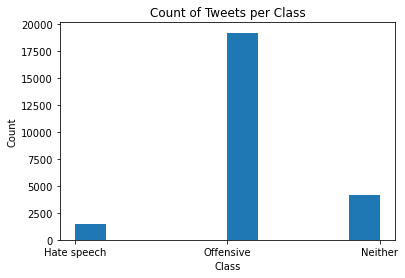

In [15]:
plt.hist(dataset['class'],align='mid')
col_names=['Hate speech','Offensive',"Neither"]
x_values = np.arange(0, len(col_names))
plt.xticks(x_values, col_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Tweets per Class')
plt.show()

## Visualization

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# optional: could use mask images

# import mask image
#mask = np.array(Image.open('comment.png'))

# set stopwords
sw = set(STOPWORDS)
sw.add("RT")

# offensive language wordcloud
wc_offensive = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==1].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_offensive)
plt.axis("off")

ModuleNotFoundError: No module named 'wordcloud'

(-0.5, 499.5, 399.5, -0.5)

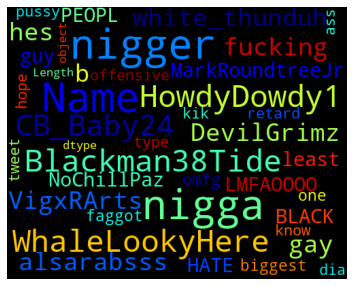

In [27]:
# hate speech wordcloud
wc_hate = WordCloud(
    width = 500,
    height = 400,
    random_state = 1,
    collocations = False,
    background_color = 'black',
    colormap = 'jet',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==0].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_hate)
plt.axis("off")

(-0.5, 499.5, 399.5, -0.5)

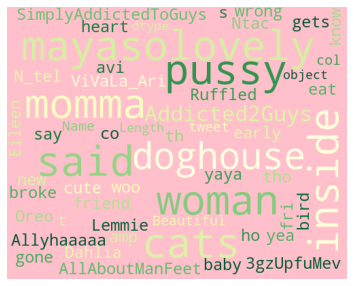

In [28]:
# neither wordcloud
wc_neither = WordCloud(
    width = 500,
    height = 400,
    random_state = 1,
    collocations = False,
    background_color = 'pink',
    colormap = 'YlGn',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==2].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_neither)
plt.axis("off")

## Preprocess

In [ ]:
corpus=[]
for i in range(0,24783):
#     review = dataset['tweet'][i]
#     review = review.split()
#     review = [word for word in review if "@" not in word] # replace id_name
#     review=' '.join(review)
#     review = re.sub('[^a-zA-Z]',' ',review)
    
    review = re.sub('[^a-zA-Z]',' ',dataset['tweet'][i]) #replace non-character with space
    review=review.lower()  #lowercasing
    review=review.split()
    ps=PorterStemmer()     #stemming
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)


In [ ]:
corpus[0:5]

In [39]:
# data cleaning
stemmer = nltk.PorterStemmer()
stopword = set(stopwords.words('english'))
new_tweet=[]
import string

def data_preprocess(review):
    review = re.sub(r'^\s+|\s+?$','',review) # remove leading and trailing whitespace
    review = re.sub(r'@[\w\-]+', '', review) # remove mentions
    review = re.sub(r'RT[\s]+', '', review) #remove retweet text 'RT'
    review = re.sub('[^a-zA-Z]',' ',review) #replace non-character with space
    review = review.lower() #lower the text
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('https?://\S+|www\.\S+', '', review) # remove hyperlinks
    review = re.sub(r'#', '', review) # remove hashtags
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review) # remove escape characters
    review = re.sub('\n', '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = [word for word in review.split(' ') if word not in stopword and word not in string.punctuation] #remove stopwords and punctuations and tokenize
    review=" ".join(review)
    review = [stemmer.stem(word) for word in review.split(' ')] #use PorterStemmer
    
    review=" ".join(review)
    new_tweet.append(review)
    return review

In [40]:
dataset['processed_tweet'] = dataset['tweet'].apply(data_preprocess)

In [41]:
dataset[['tweet','processed_tweet']].head()

,tweet,processed_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous amp man alway take t...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [42]:
new_tweet

['woman complain clean hous amp man alway take trash',
 'boy dat cold tyga dwn bad cuffin dat hoe st place',
 'dawg ever fuck bitch start cri confus shit',
 'look like tranni',
 'shit hear might true might faker bitch told ya',
 'shit blow claim faith somebodi still fuck hoe',
 'sit hate anoth bitch got much shit go',
 'caus tire big bitch come us skinni girl',
 'amp might get ya bitch back amp that',
 'hobbi includ fight mariam bitch',
 'keek bitch curv everyon lol walk convers like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go ig',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatev',
 'bitch love',
 'bitch get cut everyday b',
 'black bottl amp bad bitch',
 'broke bitch cant tell noth',
 'cancel bitch like nino',
 'cant see hoe wont chang',
 'fuck bitch dont even suck dick kermit video bout fuck ig',
 'got ya bitch tip toe hardwood floor http co cou wq l q',
 'pussi lip like heaven door',
 'hoe hit',
 'met pussi ocean dr gave pussi pill',
 

## Visualization for Comparsion

(-0.5, 499.5, 399.5, -0.5)

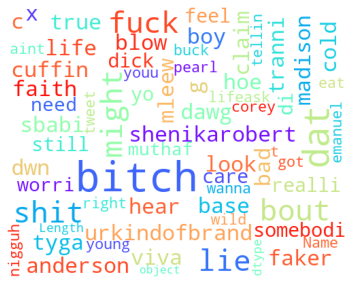

In [32]:
wc_offensive_new = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==1].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_offensive_new)
plt.axis("off")

## Embedding

In [28]:
#from sklearn.feature_extraction.text import CountVectorizer    
#cv=CountVectorizer(max_features=3600)
#x=cv.fit_transform(corpus).toarray()
from sklearn.feature_extraction.text import CountVectorizer    
cv=CountVectorizer(max_features=3600)
x=cv.fit_transform(new_tweet).toarray()

In [45]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweet'])
tfidf_a = tfidf.toarray()

In [58]:
#Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sentimentanalyzer
import nltk
nltk.download('vader_lexicon')

sentiment_analyzer = sentimentanalyzer()

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

sentiment_features = sentiment_analysis_array(dataset['processed_tweet'])

new_features = pd.DataFrame({'Neg':sentiment_features[:,0],'Pos':sentiment_features[:,1],'Neu':sentiment_features[:,2],'Compound':sentiment_features[:,3]})
new_features

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yingchenghan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Neg,Pos,Neu,Compound
0,0.205,0.221,0.574,0.0516
1,0.259,0.000,0.741,-0.5423
2,0.686,0.000,0.314,-0.8979
3,0.000,0.556,0.444,0.3612
4,0.457,0.173,0.370,-0.6808
...,...,...,...,...
24778,0.000,0.000,1.000,0.0000
24779,0.496,0.000,0.504,-0.7096
24780,0.000,0.217,0.783,0.3612
24781,0.432,0.000,0.568,-0.5859


In [67]:
# Initialize the model
#The input is a list of TaggedDocument(['list','of','word'], [TAG_001]). 
#We use the indexes of the tweets as tags
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(dataset["processed_tweet"].apply(lambda x: x.split(" ")))]

# training of the model
doc2vec_model = Doc2Vec(documents,vector_size=5, window=2, min_count=1, workers=4)

# transform each document (tweet) into a vector data
doc2vec_df = dataset["processed_tweet"].apply(lambda x: doc2vec_model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
doc2vec_df

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0.012395,-0.018113,0.100687,0.006698,-0.115006
1,-0.044071,-0.026654,-0.000918,-0.005654,-0.094297
2,0.033151,-0.049984,0.039425,-0.045895,-0.096225
3,0.022339,0.017066,0.090325,0.074145,0.056974
4,0.132251,0.040453,0.135604,-0.046232,-0.050492
...,...,...,...,...,...
24778,0.120091,-0.175360,0.115750,-0.105142,-0.243588
24779,-0.047551,-0.043569,0.080247,-0.021766,-0.166231
24780,0.087982,-0.074923,-0.063441,-0.101509,-0.101651
24781,0.043769,-0.135419,-0.010944,-0.042584,0.013680


## Train and Text Split

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((20073, 3600), (2231, 3600), (2479, 3600))

In [36]:
conda install torch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - torch

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


## Classifiers

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

In [19]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred,average='weighted')))
print('Recall score: {}'.format(recall_score(y_test, pred,average='weighted')))

confusion matrix
[[  84  108   13]
 [ 172 2637   72]
 [  16   80  536]]
Accuracy score: 0.8760086067778375
Precision score: 0.887056606184734
Recall score: 0.8760086067778375


### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\Hu\anaconda\envs\nlpproject\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print("confusion matrix")
print(cm)
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))
print('Precision is {} '.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall is {} '.format(recall_score(y_test, y_pred,average='weighted')))

confusion matrix
[[  84  108   13]
 [ 172 2637   72]
 [  16   80  536]]
Accuracy is 0.9045185583647122 
Precision is 0.8930059768779341 
Recall is 0.9045185583647122 


### SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', C=1E10) # We choose C, which is a regularization parameter, very large. More details below
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
print("confusion matrix")
print(cm)
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))
print('Precision is {} '.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall is {} '.format(recall_score(y_test, y_pred,average='weighted')))

## Deal with unbalanced data (i.e. pass Keras weights for each class)

## Manually implement LSTM or other models using TF or PyTorch